# `Proyecto Final Machine Learning`

- Linnethy Julieth Lambraño Pérez
- Diego Armando Corredor Rivera

### `0. Librerias`

In [79]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import print_function
from datetime import datetime
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
#from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
import keras.backend as K
from sklearn.neural_network import MLPClassifier
#from keras.wrappers.scikit_learn import KerasClassifier
import multiprocessing
pd.options.display.float_format = '{:,.2f}'.format

### `1. Lectura de la base de datos`

In [12]:


Datos_Ob =pd.read_csv('../Datos/ObesityDataSet_raw_and_data_sinthetic.csv')

#Datos_Ob.info()



#### `1.1 Definición de X y Y`

In [13]:
X = Datos_Ob
X = X.drop(['NObeyesdad'],axis = 1)

y = Datos_Ob["NObeyesdad"]


In [14]:
Datos_Ob.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.00,1.62,64.00,yes,no,2.00,3.00,Sometimes,no,2.00,no,0.00,1.00,no,Public_Transportation,Normal_Weight
1,Female,21.00,1.52,56.00,yes,no,3.00,3.00,Sometimes,yes,3.00,yes,3.00,0.00,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.00,1.80,77.00,yes,no,2.00,3.00,Sometimes,no,2.00,no,2.00,1.00,Frequently,Public_Transportation,Normal_Weight
3,Male,27.00,1.80,87.00,no,no,3.00,3.00,Sometimes,no,2.00,no,2.00,0.00,Frequently,Walking,Overweight_Level_I
4,Male,22.00,1.78,89.80,no,no,2.00,1.00,Sometimes,no,2.00,no,0.00,0.00,Sometimes,Public_Transportation,Overweight_Level_II


### `2. Tratamiento de variables`

#### `2.1 Identificación de tipo de variables y valores faltantes`

In [15]:
#Datos_Ob.info()
#Datos_Ob.describe()

Se evidencia que en la base de datos no se encuentra ninguna cantidad de nulos, por lo cual no hay necesidad de realizar algún método de imputación. Por otro lado con el head e info se puede observar el tipo de variables que hay en la base de datos, el cual se clasifica a continuación:

##### 1.Variables Númericas: `Age`, `Height`, `Weight`, `FCVC`, `NCP`, `CH2O`, `FAF`, `TUE`

##### 2.Variables Dummy: `Gender`, `family_history_with_overweight`, `FAVC`, `SMOKE`, `SCC`, `MTRANS`

##### 3.Variables Ordinales: `CAEC`, `CALC`


In [16]:
#Definición:

Numerica = ["Age","Height","Weight","FCVC","NCP","CH2O","FAF","TUE"]
Categorica = ["Gender", "family_history_with_overweight", "FAVC", "SMOKE", "SCC","MTRANS"]
Ordinales = ["CAEC", "CALC"]

#### `2.2 Identificación datos extremos variables numéricas`

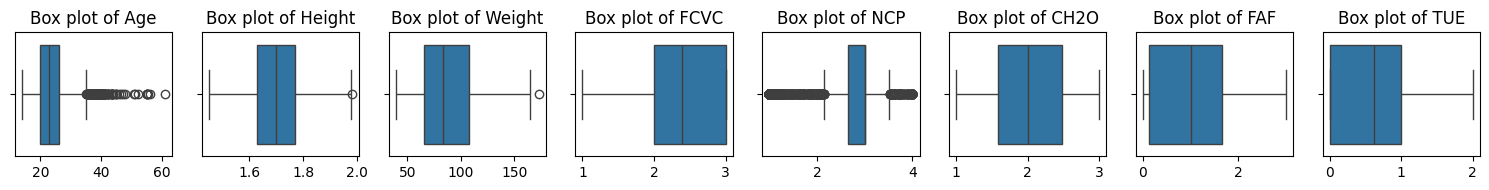

In [17]:

plt.figure(figsize=(15, 2))
for i, variable in enumerate(Numerica, 1):
    plt.subplot(1, 8, i)
    sns.boxplot(x=X[variable])
    plt.title(f'Box plot de {variable}')
    plt.xlabel('')
plt.tight_layout()
plt.show()

Dado que en las variables númericas como la edad se presenta valores continuos, se aplicara una transformación para convertir los datos y encontrar un buen ajuste del modelo.

In [18]:
X['Age'] = round(X['Age'],0)
X['FCVC'] = round(X['FCVC'],0)
X['NCP'] = round(X['NCP'],0)
X['CH2O'] = round(X['CH2O'],0)
X['FAF'] = round(X['FAF'],0)
X['TUE'] = round(X['TUE'],0)

#### `2.3 Definición de los tipos de variables`

In [19]:
from sklearn.model_selection import train_test_split

Numerica = ["Age","FCVC","NCP","CH2O","FAF","TUE"]
Categorica = ["Gender", "family_history_with_overweight", "FAVC", "SMOKE", "SCC","MTRANS"]
Ordinales = ["CAEC", "CALC"]

X_Numerica = X[Numerica]
X_Categorica = X[Categorica]
X_Ordinal = X[Ordinales]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=17)

### `3. Preprocesamiento`

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder,  OneHotEncoder
#from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


Categorica_trans = OneHotEncoder(handle_unknown='ignore')
Numerical_trans = StandardScaler()
Ordinal_trans = OrdinalEncoder()


Preprocesamiento = ColumnTransformer(
    transformers=[
        ('Categorica', Categorica_trans, Categorica),
        ('Numerica', Numerical_trans, Numerica),
        ('Oridnal', Ordinal_trans, Ordinales)
    ])



In [21]:
#Ordinal_trans.fit_transform(X_train[Ordinales])

### `4. Entrenamiento`

In [ ]:
modelo_1 = MLPClassifier(
                hidden_layer_sizes=(5),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 1000,
                random_state = 17
            )

modelo_1.fit(X=Pres.transform(X_train), y=y_train)

#### `4.1 Random Forest`

#### `4.1.1 Modelo`

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB


Random_Forest = RandomForestClassifier(random_state=17)

Modelo_RF = Pipeline(
    [
        ("Preprocesamiento", Preprocesamiento),
        ("Clasificador_RF", Random_Forest),       
    ]
)
Modelo_RF.fit(X_train, y_train)

Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('Categorica',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SMOKE', 'SCC',
                                                   'MTRANS']),
                                                 ('Numerica', StandardScaler(),
                                                  ['Age', 'FCVC', 'NCP', 'CH2O',
                                                   'FAF', 'TUE']),
                                                 ('Oridnal', OrdinalEncoder(),
                                                  ['CAEC', 'CALC'])])),
                ('Clasificador_RF', RandomForestClassifier(random_state=17))])

In [23]:
Pres=Modelo_RF['Preprocesamiento']
#Pres.get_feature_names_out()

In [24]:
DF=pd.DataFrame(Pres.transform(X_train), columns=Pres.get_feature_names_out())
DF

,Categorica__Gender_Female,Categorica__Gender_Male,Categorica__family_history_with_overweight_no,Categorica__family_history_with_overweight_yes,Categorica__FAVC_no,Categorica__FAVC_yes,Categorica__SMOKE_no,Categorica__SMOKE_yes,Categorica__SCC_no,Categorica__SCC_yes,...,Categorica__MTRANS_Public_Transportation,Categorica__MTRANS_Walking,Numerica__Age,Numerica__FCVC,Numerica__NCP,Numerica__CH2O,Numerica__FAF,Numerica__TUE,Oridnal__CAEC,Oridnal__CALC
0,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,...,1.00,0.00,0.28,0.98,0.39,1.43,1.11,0.50,2.00,2.00
1,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,...,1.00,0.00,-0.19,0.98,-2.08,-0.04,-0.02,1.98,2.00,2.00
2,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,...,1.00,0.00,-0.66,-0.72,1.62,1.43,1.11,1.98,2.00,3.00
3,1.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,...,0.00,0.00,0.75,-0.72,0.39,-0.04,1.11,-0.99,2.00,2.00
4,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,...,1.00,0.00,-0.19,0.98,0.39,1.43,-0.02,1.98,2.00,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,1.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,...,1.00,0.00,-0.51,0.98,0.39,-1.51,1.11,-0.99,0.00,3.00
1684,1.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,...,1.00,0.00,-0.51,-0.72,0.39,1.43,2.23,-0.99,2.00,2.00
1685,1.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,...,0.00,0.00,3.11,-0.72,0.39,1.43,-1.14,-0.99,2.00,2.00
1686,1.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,...,1.00,0.00,4.21,0.98,0.39,1.43,1.11,-0.99,2.00,3.00


#### `4.1.2 Importancia de variables`

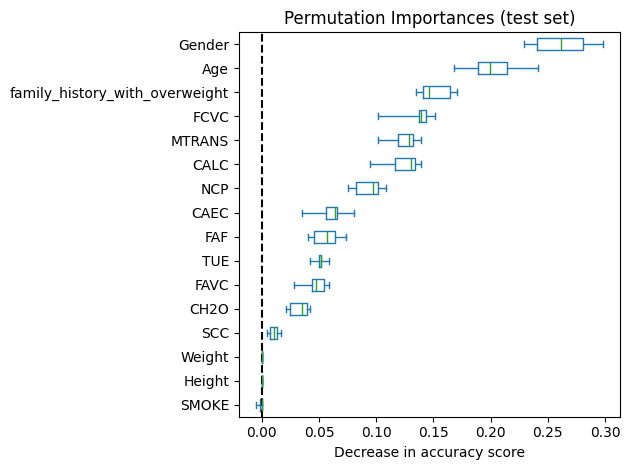

In [25]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    Modelo_RF, X_test, y_test, n_repeats=10, random_state=17, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_test.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [26]:
#Modelo_RF.set_params(Clasificador__min_samples_leaf=20).fit(X_train, y_train)
#print(f"RF train accuracy: {Modelo_RF.score(X_train, y_train):.3f}")
#print(f"RF test accuracy: {Modelo_RF.score(X_test, y_test):.3f}")

### `4. Modelos y entrenamiento`

In [27]:

#Modelo_RF.fit(Pres(X_train),Pres(y_train))


### `5. Tuning parámetros`

### `5.1. Random Forest`

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


parametros_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'criterion':['gini', 'entropy'],
    'random_state': [17]
}


grid_search_RF = GridSearchCV(RandomForestClassifier(), parametros_grid, cv=5, scoring='accuracy')


grid_search_RF.fit(Pres.transform(X_train), y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [100, 200, 300],
                         'random_state': [17]},
             scoring='accuracy')

In [29]:
random_search_RF = RandomizedSearchCV(RandomForestClassifier(), parametros_grid, cv=5, scoring='accuracy')

random_search_RF.fit(Pres.transform(X_train), y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [100, 200, 300],
                                        'random_state': [17]},
                   scoring='accuracy')

### `5.1.2. Resultado`

In [30]:
# Grid
print("Mejores parámetros Grid:", grid_search_RF.best_params_)
print("Mejor accuracy Grid:", grid_search_RF.best_score_)

# Random
print("Mejores parámetros Random:", random_search_RF.best_params_)
print("Mejor accuracy Random:", random_search_RF.best_score_)

Mejores parámetros Grid: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 17}
Mejor accuracy Grid: 0.8056976805436061
Mejores parámetros Random: {'random_state': 17, 'n_estimators': 300, 'min_samples_split': 2, 'max_depth': 20, 'criterion': 'gini'}
Mejor accuracy Random: 0.8051059645672748


Con el resultado anterior se evidenia que el mejor modelo es el grid con un accuracy del 0.805

### `5.1.3. Importancia de variables`

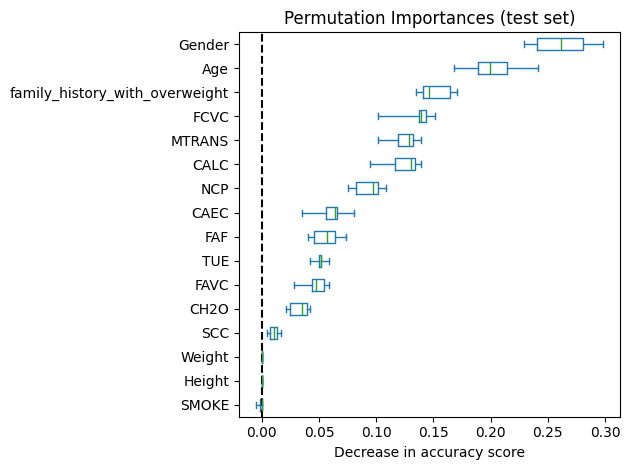

In [31]:

result_RF = permutation_importance(
    Modelo_RF, X_test, y_test, n_repeats=10, random_state=17, n_jobs=2
)

sorted_importances_idx = result_RF.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_test.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

### `5.2. Naive Bayes`

In [32]:
Naive_Bayes = GaussianNB()

Modelo_NB = Pipeline(
    [
        ("Preprocesamiento", Preprocesamiento),
        ("Clasificador_NB", Naive_Bayes),       
    ]
)
Modelo_NB.fit(X_train, y_train)

Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('Categorica',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SMOKE', 'SCC',
                                                   'MTRANS']),
                                                 ('Numerica', StandardScaler(),
                                                  ['Age', 'FCVC', 'NCP', 'CH2O',
                                                   'FAF', 'TUE']),
                                                 ('Oridnal', OrdinalEncoder(),
                                                  ['CAEC', 'CALC'])])),
                ('Clasificador_NB', GaussianNB())])

In [33]:
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
np.logspace(0,-9, num=10)


cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=17)

parametros_grid = {'var_smoothing': np.logspace(0,-9, num=100)}


grid_search_NB = GridSearchCV(GaussianNB(), parametros_grid, cv=cv_method, scoring='accuracy')

grid_search_NB.fit(Pres.transform(X_train), y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=17),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5....
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy')

In [34]:
random_search_NB = RandomizedSearchCV(GaussianNB(), parametros_grid, cv=5, scoring='accuracy')

random_search_NB.fit(Pres.transform(X_train), y_train)

RandomizedSearchCV(cv=5, estimator=GaussianNB(),
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   scoring='accuracy')

In [35]:
# Grid
print("Mejores parámetros Grid:", grid_search_NB.best_params_)
print("Mejor accuracy Grid:", grid_search_NB.best_score_)

# Random
print("Mejores parámetros Random:", random_search_NB.best_params_)
print("Mejor accuracy Random:", random_search_NB.best_score_)

Mejores parámetros Grid: {'var_smoothing': 0.02848035868435802}
Mejor accuracy Grid: 0.5351932295050305
Mejores parámetros Random: {'var_smoothing': 0.003511191734215131}
Mejor accuracy Random: 0.5201359015328428


Se evidencia que con los modelos de Naive Bayes, estos no presentan un accuracy más del 0.535

### `5.2.1. Importancia de variables`

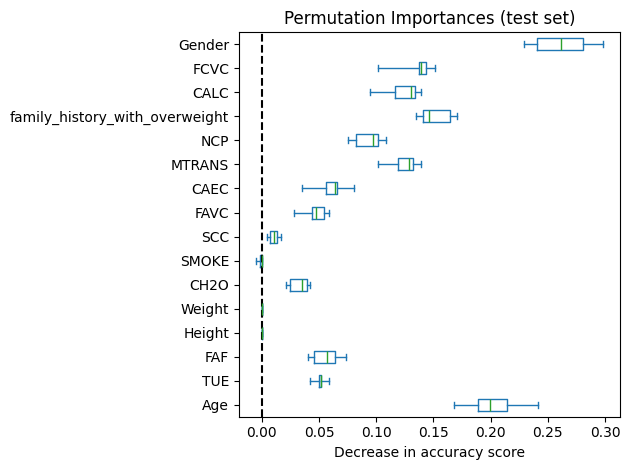

In [36]:

result_NB = permutation_importance(
    Modelo_NB, X_test, y_test, n_repeats=10, random_state=17, n_jobs=2
)

sorted_importances_idx = result_NB.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_test.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

### `5.3. Arboles de Decisión`

In [37]:
Decision_Tree = DecisionTreeClassifier()

Modelo_DT = Pipeline(
    [
        ("Preprocesamiento", Preprocesamiento),
        ("Clasificador_NB", Decision_Tree),       
    ]
)
Modelo_DT.fit(X_train, y_train)

Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('Categorica',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SMOKE', 'SCC',
                                                   'MTRANS']),
                                                 ('Numerica', StandardScaler(),
                                                  ['Age', 'FCVC', 'NCP', 'CH2O',
                                                   'FAF', 'TUE']),
                                                 ('Oridnal', OrdinalEncoder(),
                                                  ['CAEC', 'CALC'])])),
                ('Clasificador_NB', DecisionTreeClassifier())])

In [38]:
parametros_grid = {
    'max_depth':[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'random_state':[0,2,4],
    'criterion':['gini', 'entropy'],
    'random_state': [17]
              } 


grid_search_DT = GridSearchCV(DecisionTreeClassifier(), parametros_grid, cv=5, scoring='accuracy')

grid_search_DT.fit(Pres.transform(X_train), y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20],
                         'random_state': [17]},
             scoring='accuracy')

In [39]:
random_search_DT = RandomizedSearchCV(DecisionTreeClassifier(), parametros_grid, cv=5, scoring='accuracy')

random_search_DT.fit(Pres.transform(X_train), y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      11, 12, 13, 14, 15, 16,
                                                      17, 18, 19, 20],
                                        'random_state': [17]},
                   scoring='accuracy')

In [40]:
# Grid
print("Mejores parámetros Grid:", grid_search_DT.best_params_)
print("Mejor accuracy Grid:", grid_search_DT.best_score_)

# Random
print("Mejores parámetros Random:", random_search_DT.best_params_)
print("Mejor accuracy Random:", random_search_DT.best_score_)

Mejores parámetros Grid: {'criterion': 'entropy', 'max_depth': 13, 'random_state': 17}
Mejor accuracy Grid: 0.7428915070321142
Mejores parámetros Random: {'random_state': 17, 'max_depth': 13, 'criterion': 'entropy'}
Mejor accuracy Random: 0.7428915070321142


Con el resultado anterior se evidenia que el mejor modelo es el grid con un accuracy del 0.805

### `5.3.1. Importancia de variables`

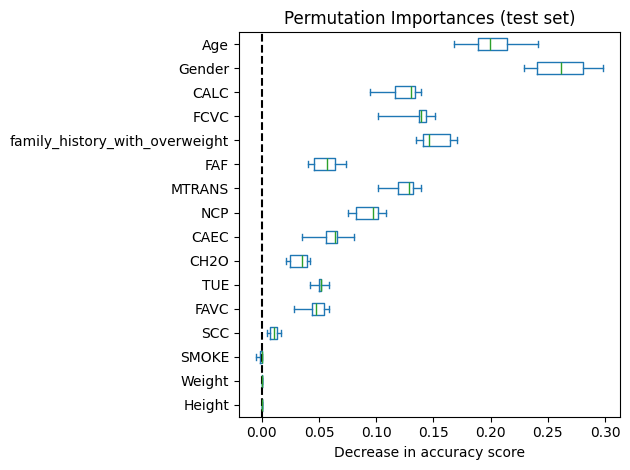

In [41]:

result_DT = permutation_importance(
    Modelo_DT, X_test, y_test, n_repeats=10, random_state=17, n_jobs=2
)

sorted_importances_idx = result_DT.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_test.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

### `5.4. Logística`

In [46]:
Logistica = LogisticRegression()

Modelo_RL = Pipeline(
    [
        ("Preprocesamiento", Preprocesamiento),
        ("Clasificador_RL", Logistica),       
    ]
)
Modelo_RL.fit(X_train, y_train)

Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('Categorica',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SMOKE', 'SCC',
                                                   'MTRANS']),
                                                 ('Numerica', StandardScaler(),
                                                  ['Age', 'FCVC', 'NCP', 'CH2O',
                                                   'FAF', 'TUE']),
                                                 ('Oridnal', OrdinalEncoder(),
                                                  ['CAEC', 'CALC'])])),
                ('Clasificador_RL', LogisticRegression())])

In [47]:
parametros_grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge


grid_search_RL = GridSearchCV(LogisticRegression(), parametros_grid, cv=5, scoring='accuracy')

grid_search_RL.fit(Pres.transform(X_train), y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [52]:
random_search_RL = RandomizedSearchCV(LogisticRegression(), parametros_grid, cv=5, scoring='accuracy')

random_search_RL.fit(Pres.transform(X_train), y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'penalty': ['l1', 'l2']},
                   scoring='accuracy')

In [53]:
# Grid
print("Mejores parámetros Grid:", grid_search_RL.best_params_)
print("Mejor accuracy Grid:", grid_search_RL.best_score_)

# Random
print("Mejores parámetros Random:", random_search_RL.best_params_)
print("Mejor accuracy Random:", random_search_RL.best_score_)

Mejores parámetros Grid: {'C': 100.0, 'penalty': 'l2'}
Mejor accuracy Grid: 0.5900444225940689
Mejores parámetros Random: {'penalty': 'l2', 'C': 100.0}
Mejor accuracy Random: 0.5900444225940689


### `5.5. Redes Neuronales`

In [ ]:
Logistica = LogisticRegression()

Modelo_RL = Pipeline(
    [
        ("Preprocesamiento", Preprocesamiento),
        ("Clasificador_RL", Logistica),       
    ]
)
Modelo_RL.fit(X_train, y_train)

In [80]:
param_distributions = {
    'hidden_layer_sizes': [(10), (10, 10), (20, 20)],
    'alpha': np.logspace(-3, 3, 7),
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Búsqueda por validación cruzada
# ==============================================================================
grid = RandomizedSearchCV(
        estimator  = MLPClassifier(solver = 'lbfgs', max_iter= 2000),
        param_distributions = param_distributions,
        n_iter     = 50, # Número máximo de combinaciones probadas
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 3, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

Modelo_RN_R= grid.fit(X=Pres.transform(X_train), y=y_train)

In [81]:
modelo = grid.best_estimator_
modelo

MLPClassifier(alpha=10.0, hidden_layer_sizes=(20, 20), learning_rate_init=0.1,
              max_iter=2000, solver='lbfgs')

In [92]:
modelo_final = grid.best_estimator_
modelo_final

MLPClassifier(alpha=10.0, hidden_layer_sizes=(20, 20), learning_rate_init=0.1,
              max_iter=2000, solver='lbfgs')

In [90]:
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = Pres.transform(X_test))


In [73]:
param_grid = {'hidden_layer_sizes':[1, 5, 10, 15, 25, 50]}


grid = GridSearchCV(
        estimator = MLPClassifier(
                        learning_rate_init=0.01,
                        solver = 'lbfgs',
                        alpha  = 0,
                        max_iter = 5000,
                        random_state = 17
                    ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 5,
        refit      = True,
        return_train_score = True
      )

Modelo_RN = grid.fit(X=Pres.transform(X_train), y=y_train)

In [ ]:
grid_search_RN = GridSearchCV(LogisticRegression(), parametros_grid, cv=5, scoring='accuracy')

grid_search_RL.fit(Pres.transform(X_train), y_train)

In [74]:
# Grid
print("Mejores parámetros Grid:", Modelo_RN.best_params_)
print("Mejor accuracy Grid:", Modelo_RN.best_score_)

Mejores parámetros Grid: {'hidden_layer_sizes': 50}
Mejor accuracy Grid: 0.7209418292276087


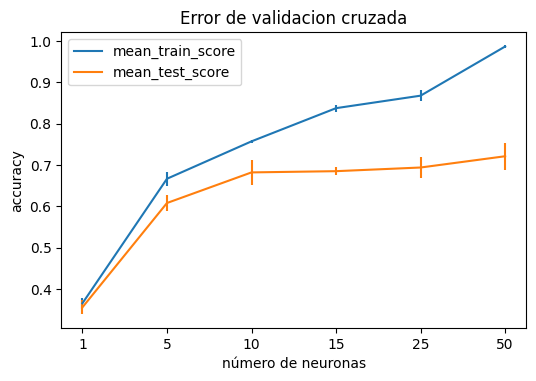

In [75]:
fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_hidden_layer_sizes', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_hidden_layer_sizes', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_ylabel('accuracy')
ax.set_xlabel('número de neuronas')
ax.set_title('Error de validacion cruzada');

In [62]:
grid_x1 = np.linspace(start=min(X[:, 0]), stop=max(X[:, 0]), num=100)
grid_x2 = np.linspace(start=min(X[:, 1]), stop=max(X[:, 1]), num=100)

InvalidIndexError: (slice(None, None, None), 0)

In [72]:
min(X_train[:, 0])

InvalidIndexError: (slice(None, None, None), 0)

InvalidIndexError: (slice(None, None, None), 0)

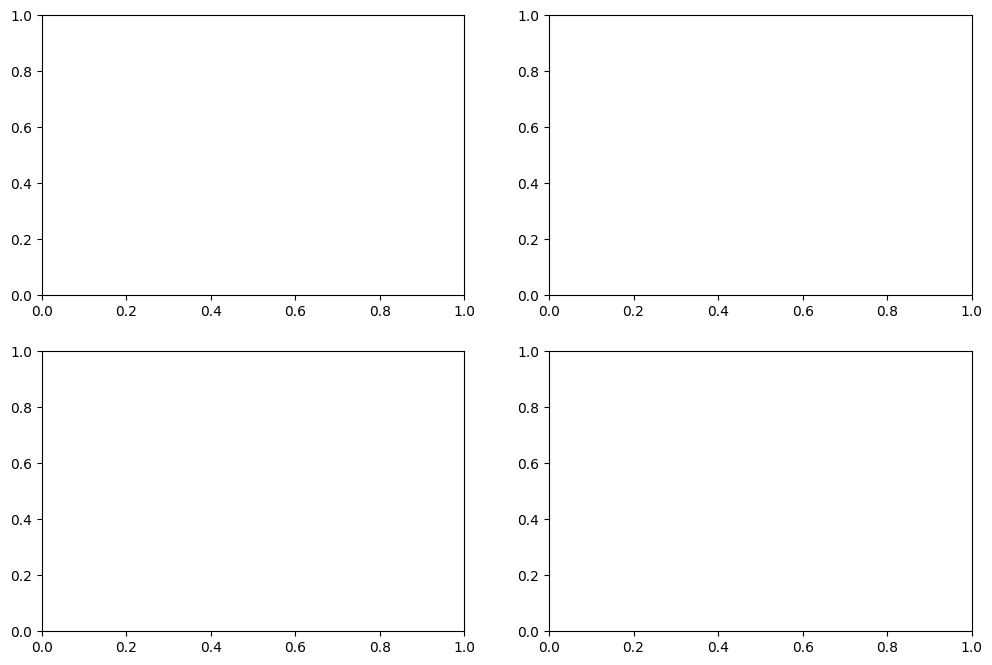

In [69]:
fig, axs = plt.subplots(2, 2, figsize=(12,8))
axs = axs.flatten()
grid_x1 = np.linspace(start=min(X_train[:, 0]), stop=max(X_train[:, 0]), num=100)

InvalidIndexError: (slice(None, None, None), 0)

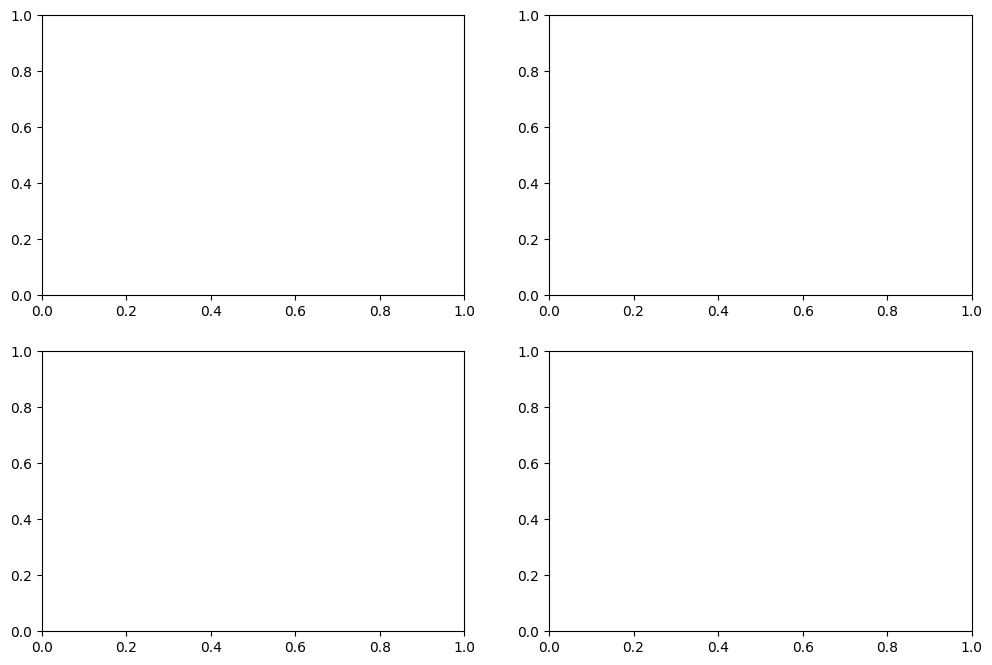

In [64]:
fig, axs = plt.subplots(2, 2, figsize=(12,8))
axs = axs.flatten()
grid_x1 = np.linspace(start=min(X[:, 0]), stop=max(X[:, 0]), num=100)
grid_x2 = np.linspace(start=min(X[:, 1]), stop=max(X[:, 1]), num=100)
xx, yy = np.meshgrid(grid_x1, grid_x2)
X_grid = np.column_stack([xx.flatten(), yy.flatten()])

for i, modelo in enumerate([modelo_1, modelo_2, modelo_3, modelo_4]):
    
    predicciones = modelo.predict(X_grid)
    
    for j in np.unique(predicciones):
        axs[i].scatter(
            x = X_grid[predicciones == j, 0],
            y = X_grid[predicciones == j, 1], 
            c = plt.rcParams['axes.prop_cycle'].by_key()['color'][j],
            #marker = 'o',
            alpha = 0.3,
            label= f"Grupo {j}"
        )

    for j in np.unique(y):
        axs[i].scatter(
            x = X[y == j, 0],
            y = X[y == j, 1], 
            c = plt.rcParams['axes.prop_cycle'].by_key()['color'][j],
            marker    = 'o',
            edgecolor = 'black'
        )
        
    axs[i].set_title(f"Capas ocultas: {modelo.hidden_layer_sizes}")
    axs[i].axis('off')
axs[0].legend();

In [42]:

from keras.models import Sequential

bin_clas = Sequential()
bin_clas.add(Dense(32, input_shape=(X_train.shape[1],), activation='tanh'))
bin_clas.add(Dense(16, activation='tanh'))
bin_clas.add(Dense(1, activation='sigmoid'))

bin_clas.compile(Adam(lr=0.1), 'binary_crossentropy', metrics=['accuracy'])

bin_hist = bin_clas.fit(X_train, y_train, epochs=100)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

### `6. Evaluación de los modelos`

Para la evaluación de los modelos, se tomaran aquellos que presentaron un minimo de 0.7 en su accuracy.

Random Forest Test Accuracy Grid: 0.7919621749408984
Decision Tree Test Accuracy Grid: 0.7990543735224587
Random Forest Test Accuracy Random: 0.7943262411347518
Decision Tree Test Accuracy Random: 0.7990543735224587


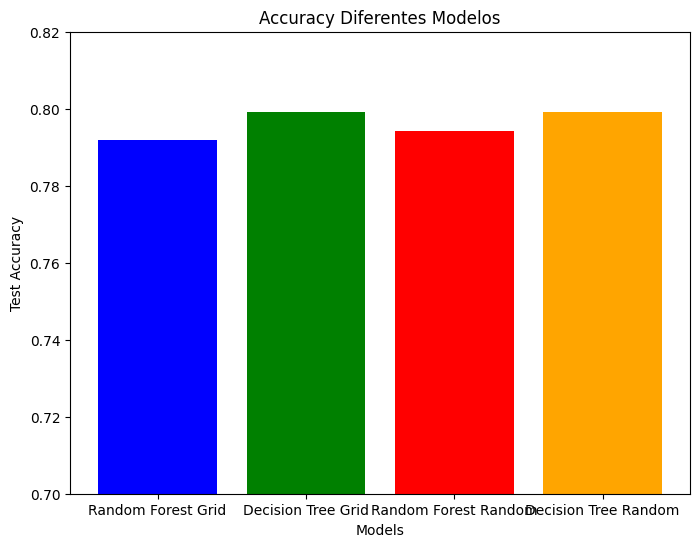

In [ ]:
Mejor_Modelo_RF_Grid = RandomForestClassifier(criterion='gini', max_depth=None, min_samples_split=2, n_estimators=100, random_state=17)
Mejor_Modelo_DT_Grid = RandomForestClassifier(criterion='entropy', max_depth=13, random_state=17)
Mejor_Modelo_RF_Random = RandomForestClassifier(criterion='gini', max_depth=20, min_samples_split=2, n_estimators=100, random_state=17)
Mejor_Modelo_DT_Random = RandomForestClassifier(criterion='entropy', max_depth=14, random_state=17)




# Entrenamiento mejores modelos
Mejor_Modelo_RF_Grid.fit(Pres.transform(X_train), y_train)
Mejor_Modelo_DT_Grid.fit(Pres.transform(X_train), y_train)
Mejor_Modelo_RF_Random.fit(Pres.transform(X_train), y_train)
Mejor_Modelo_DT_Random.fit(Pres.transform(X_train), y_train)



# Evaluar modelos en el test
RF_test_accuracy_Grid = Mejor_Modelo_RF_Grid.score(Pres.transform(X_test), y_test)
DT_test_accuracy_Grid = Mejor_Modelo_DT_Grid.score(Pres.transform(X_test), y_test)
RF_test_accuracy_Random = Mejor_Modelo_RF_Random.score(Pres.transform(X_test), y_test)
DT_test_accuracy_Random = Mejor_Modelo_DT_Random.score(Pres.transform(X_test), y_test)



print("Random Forest Test Accuracy Grid:", RF_test_accuracy_Grid)
print("Decision Tree Test Accuracy Grid:", DT_test_accuracy_Grid)
print("Random Forest Test Accuracy Random:", RF_test_accuracy_Random)
print("Decision Tree Test Accuracy Random:", DT_test_accuracy_Random)



Modelos = ['Random Forest Grid', 'Decision Tree Grid','Random Forest Random', 'Decision Tree Random']
Accuracy = [RF_test_accuracy_Grid, DT_test_accuracy_Grid, RF_test_accuracy_Random, DT_test_accuracy_Random]

# Grafico
plt.figure(figsize=(8, 6))
plt.bar(Modelos, Accuracy, color=['blue', 'green', 'red', 'orange'])
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.title('Accuracy Diferentes Modelos')
plt.ylim(0.7, 0.82) 
plt.show()

### `7. Predecicción`

In [ ]:
y_pred = Mejor_Modelo_DT_Grid.predict(Pres.transform(X_test))
Resultado = pd.DataFrame({'Real': y_test, 'Predicción': y_pred})
print(Resultado.head())

                     Real           Predicción
366   Overweight_Level_II       Obesity_Type_I
1324       Obesity_Type_I       Obesity_Type_I
2098     Obesity_Type_III     Obesity_Type_III
19     Overweight_Level_I  Overweight_Level_II
514   Insufficient_Weight  Insufficient_Weight


### `7.1 Clasificación`

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.83      0.80      0.81        54
      Normal_Weight       0.70      0.66      0.68        58
     Obesity_Type_I       0.72      0.80      0.76        70
    Obesity_Type_II       0.79      0.95      0.86        60
   Obesity_Type_III       0.98      0.98      0.98        65
 Overweight_Level_I       0.82      0.71      0.76        58
Overweight_Level_II       0.75      0.67      0.71        58

           accuracy                           0.80       423
          macro avg       0.80      0.80      0.79       423
       weighted avg       0.80      0.80      0.80       423



### `7.2 Matriz de Confusión`

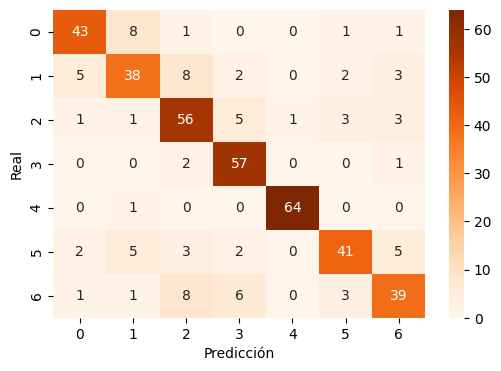

In [ ]:
Matrix_Conf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(Matrix_Conf, annot=True, fmt="d", cmap='Oranges')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

### `7.3 Curva ROC`

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

obesity_score_probability = Mejor_Modelo_DT_Grid.predict_proba(Pres.transform(X_test))
obesity_score_probability
roc_auc_score(y_test, obesity_score_probability, multi_class = "ovr")

0.964889884697188

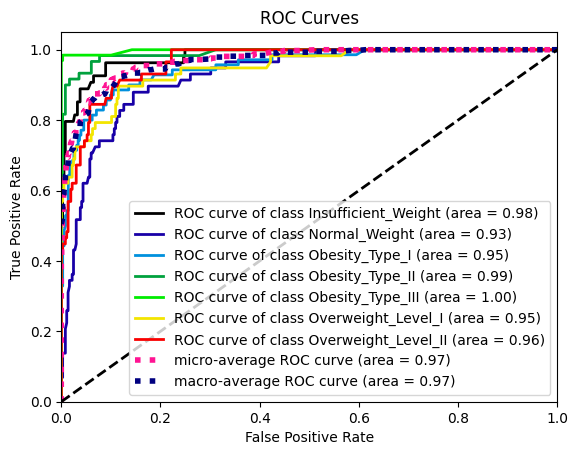

In [ ]:
import scikitplot as skplt


skplt.metrics.plot_roc(y_test, obesity_score_probability)
plt.show()